<a href="https://colab.research.google.com/github/RyukiKuwahara/from-zero/blob/main/from_zero_1_for_studnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def function_and(x1, x2):
    w1, w2 =
    b =
    y = x1 * w1 + x2 * w2 + b
    if y <= 0:
        return 0
    else:
        return 1

SyntaxError: invalid syntax (<ipython-input-1-4e8bce93f93f>, line 2)

In [2]:
def function_or(x1, x2):
    w1, w2 =
    b =
    y = x1 * w1 + x2 * w2 + b
    if y <= 0:
        return 0
    else:
        return 1

SyntaxError: invalid syntax (<ipython-input-2-129e7ad44a7a>, line 2)

In [3]:
def function_nand(x1, x2):
    w1, w2 =
    b =
    y = x1 * w1 + x2 * w2 + b
    if y <= 0:
        return 0
    else:
        return 1

SyntaxError: invalid syntax (<ipython-input-3-243d777cb268>, line 2)

In [ ]:
def function_nor(x1, x2):
    w1, w2 =
    b =
    y = x1 * w1 + x2 * w2 + b
    if y <= 0:
        return 0
    else:
        return 1

In [ ]:
def print_truth_table(f):
    print("x1\tx2\ty")
    print("-" * 20)
    for x1 in [0, 1]:
        for x2 in [0, 1]:
            print(f"{x1}\t{x2}\t{f(x1, x2)}")

In [ ]:
print("and")
print_truth_table(function_and)
print("-" * 20)

print("or")
print_truth_table(function_or)
print("-" * 20)

print("nand")
print_truth_table(function_nand)
print("-" * 20)

print("nor")
print_truth_table(function_nor)


In [ ]:
function_xor = lambda x1, x2: function_x(function_x(x1, x2), function_x(x2, x1))
print("xor")
print_truth_table(function_xor)

          x         y  label
0  0.236619 -0.036414      1
1 -0.419609 -0.154606      1
2 -0.959386 -0.013257      1
3 -0.239587 -0.092829      1
4 -0.487341  0.393542      1


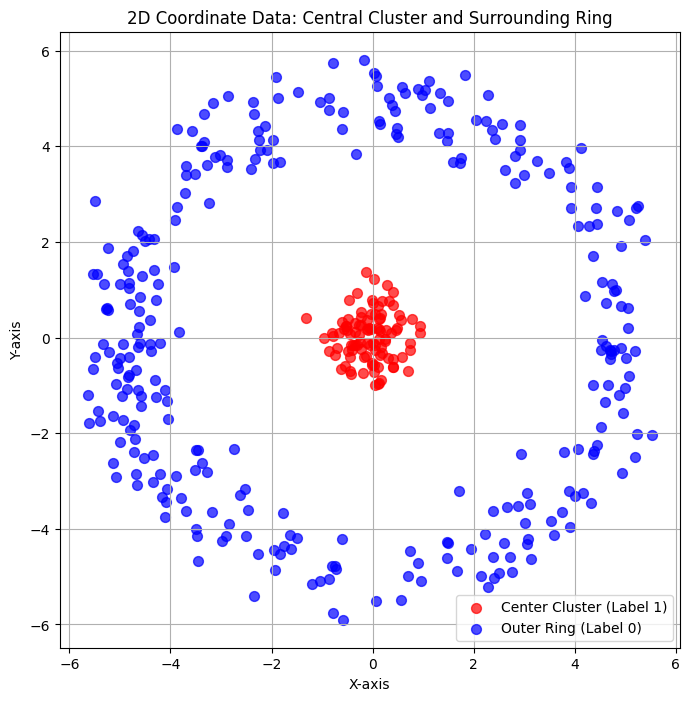

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('dataset.csv')

# Display the first few rows of the dataframe
print(df.head())

# Plotting the loaded dataset
plt.figure(figsize=(8, 8))
plt.scatter(df[df['label'] == 1]['x'], df[df['label'] == 1]['y'], s=50, alpha=0.7, c='red', label='Center Cluster (Label 1)')
plt.scatter(df[df['label'] == 0]['x'], df[df['label'] == 0]['y'], s=50, alpha=0.7, c='blue', label='Outer Ring (Label 0)')
plt.title("2D Coordinate Data: Central Cluster and Surrounding Ring")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
def my_activation_function(x):
    if x < 0:
        return 0
    else:
        return x

In [9]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def my_neural_network(x, y, activation_function):
    # layer1
    w_11 = {'w1': 0, 'w2': 0, 'b': 0}
    neuron11 = activation_function(w_11['w1'] * x + w_11['w2'] * y + w_11['b'])
    w_12 = {'w1': 0, 'w2': 0, 'b': 0}
    neuron12 = activation_function(w_12['w1'] * x + w_12['w2'] * y + w_12['b'])
    w_13 = {'w1': 0, 'w2': 0, 'b': 0}
    neuron13 = activation_function(w_13['w1'] * x + w_13['w2'] * y + w_13['b'])
    w_14 = {'w1': 0, 'w2': 0, 'b': 0}
    neuron14 = activation_function(w_14['w1'] * x + w_14['w2'] * y + w_14['b'])

    # layer2
    w_21 = {'w1': 0, 'w2': 0, 'w3': 0, 'w4': 0, 'b': 0}
    x = neuron11 * w_21['w1'] + neuron12 * w_21['w2'] + neuron13 * w_21['w3'] + neuron14 * w_21['w4'] + w_21['b']

    p = sigmoid(x)

    threshold = 0.5
    if p >= threshold:
        ans = 1
    else:
        ans = 0

    return ans

In [10]:
def print_result(df):
    cnt = 0
    predictions = []

    for index, row in df.iterrows():
        x = row['x']
        y = row['y']
        label = row['label']

        ans = my_neural_network(x, y, my_activation_function)
        predictions.append(ans)

        if ans == label:
            cnt += 1

    correction_rate = cnt / len(df) * 100
    print(f"Correction rate: {correction_rate:.2f}%")

    df['prediction'] = predictions

    # Plotting the actual labels
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(df[df['label'] == 1]['x'], df[df['label'] == 1]['y'], c='red', label='Actual Label 1', alpha=0.5)
    plt.scatter(df[df['label'] == 0]['x'], df[df['label'] == 0]['y'], c='blue', label='Actual Label 0', alpha=0.5)
    plt.title('Actual Labels')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

    # Plotting the predicted labels
    plt.subplot(1, 2, 2)
    plt.scatter(df[df['prediction'] == 1]['x'], df[df['prediction'] == 1]['y'], c='red', label='Predicted Label 1', alpha=0.5)
    plt.scatter(df[df['prediction'] == 0]['x'], df[df['prediction'] == 0]['y'], c='blue', label='Predicted Label 0', alpha=0.5)
    plt.title('Predicted Labels')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

    plt.show()

Correction rate: 25.00%


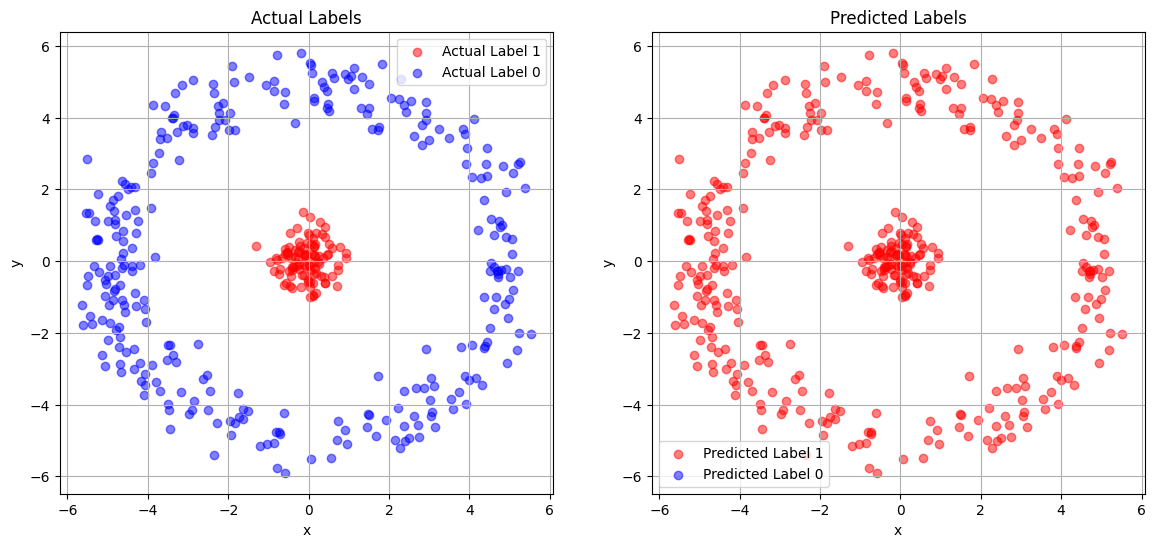

In [11]:
print_result(df)